In [1]:
import sklearn
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt


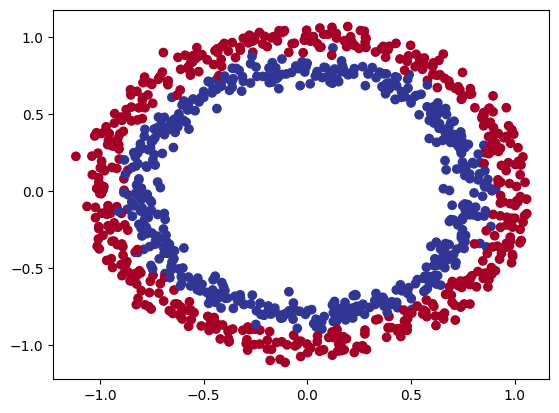

In [2]:
n_samples = 1000
X,y = make_circles(n_samples,noise=0.05, random_state=42)

plt.scatter(X[:,0],X[:,1], c=y, cmap= plt.cm.RdYlBu)

In [3]:
# Split
import torch
from torch import nn
from sklearn.model_selection import train_test_split

X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

In [4]:
from torch import nn

device= "cuda" if torch.cuda.is_available() else 'cpu'

class CircularModel(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.layer_1=nn.Linear(in_features=2,out_features=128)
        self.layer_2=nn.Linear(in_features=128,out_features=256)
        self.layer_3=nn.Linear(in_features=256,out_features=512)
        self.layer_4=nn.Linear(in_features=512, out_features=256)
        self.layer_5=nn.Linear(in_features=256, out_features=1)
        self.relu=nn.ReLU()
    def forward(self,x):
        return self.layer_5(self.relu(self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))))
    
model_1= CircularModel().to(device)

In [5]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer= torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [6]:
def accuracy(y_true, y_pred):
    correct= torch.eq(y_true,y_pred).sum().item()
    acc= (correct/len(y_pred))*100

    return acc

In [7]:
# Training and testing loop

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=2000

X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device), y_test.to(device)

for epoch in range (epochs):
    ### Trainning ###
    model_1.train()

    y_logits=model_1(X_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))

    loss=loss_fn(y_logits,y_train)
    acc=accuracy(y_train, y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing ###
    model_1.eval()

    with torch.inference_mode():
        y_test_logits=model_1(X_test).squeeze()
        y_test_pred=torch.round(torch.sigmoid(y_test_logits))

        test_loss= loss_fn(y_test_logits,y_test)
        test_acc= accuracy(y_test,y_test_pred)
    
    if epoch % 100 ==0:
        print(f"|Epochs : {epoch} | Loss : {loss:.4f}  Train_Acc: {acc:.2f}% | Test_loss : {test_loss:.4f}  Test_Acc : {test_acc:.2f}% | ")


|Epochs : 0 | Loss : 0.6931  Train_Acc: 50.00% | Test_loss : 0.6933  Test_Acc : 50.00% | 
|Epochs : 100 | Loss : 0.6863  Train_Acc: 65.62% | Test_loss : 0.6883  Test_Acc : 60.00% | 
|Epochs : 200 | Loss : 0.6715  Train_Acc: 77.50% | Test_loss : 0.6773  Test_Acc : 69.50% | 
|Epochs : 300 | Loss : 0.5750  Train_Acc: 95.62% | Test_loss : 0.5962  Test_Acc : 88.50% | 
|Epochs : 400 | Loss : 0.5156  Train_Acc: 62.12% | Test_loss : 0.5566  Test_Acc : 59.00% | 
|Epochs : 500 | Loss : 0.3851  Train_Acc: 79.62% | Test_loss : 0.4655  Test_Acc : 73.00% | 
|Epochs : 600 | Loss : 0.1084  Train_Acc: 97.75% | Test_loss : 0.1825  Test_Acc : 94.50% | 
|Epochs : 700 | Loss : 0.0681  Train_Acc: 98.12% | Test_loss : 0.1480  Test_Acc : 94.50% | 
|Epochs : 800 | Loss : 0.0784  Train_Acc: 98.38% | Test_loss : 0.1575  Test_Acc : 94.50% | 
|Epochs : 900 | Loss : 0.0577  Train_Acc: 98.75% | Test_loss : 0.1444  Test_Acc : 94.00% | 
|Epochs : 1000 | Loss : 0.0506  Train_Acc: 98.75% | Test_loss : 0.1424  Test_Acc :

In [8]:
## Make prediction
model_1.eval()
with torch.inference_mode():
    y_logit= model_1(X_test)
    y_pred=torch.round(torch.sigmoid(y_logit)).squeeze()

y_pred, y_test

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
         1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
         0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
         1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
         0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
         0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
         0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
         1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
         0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
         1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
         0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
         1., 1.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 

In [9]:
import requests

from pathlib import Path

if Path('helper_function.py'). is_file():
    print('It exists')

else:
    print('Downloading')

    request= requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')

    with open('helper_functions.py', 'wb') as f:
        f.write(request.content)

from helper_functions import plot_decision_boundary, plot_predictions

Downloading


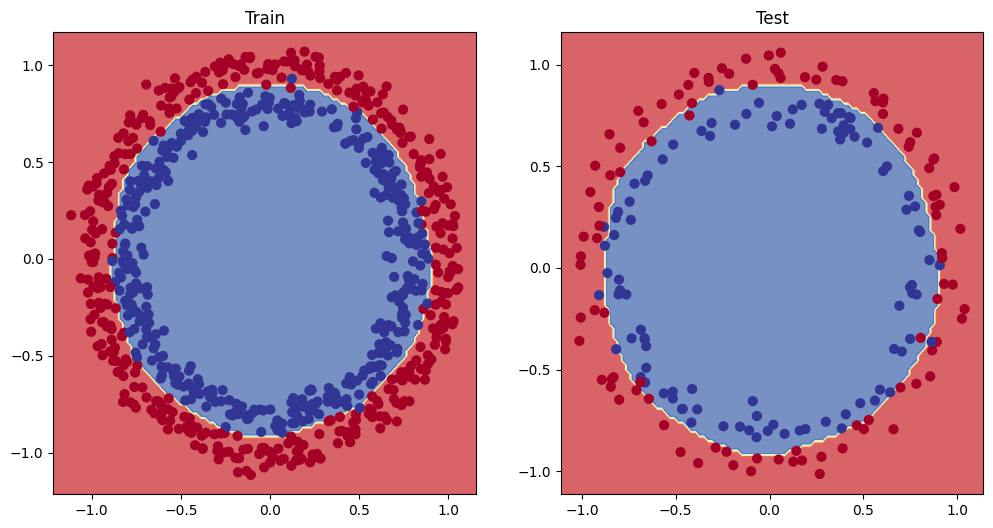

In [10]:
#Plot the decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_1, X_test,y_test)